<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

# Основные понятия статистики



https://netology-ds.slack.com/files/UG8184U07/FNFSHL5T9/1savel_ev_vladimir_statistika_i_kotiki.pdf

Возьмем данные о фильмах с контентом на английском языке. 

In [2]:
url="http://yustiks.ru/dataset/FilmTV_dataset.csv"
df=pd.read_csv(url)

*   **filmtv_ID** FilmTV ID
*   **film_title** Movie Title
*   **year** Year of Release
*   **genre** Movie Genre
*   **duration** Movie Duration
*   **country** Movie Country
*   **director** Movie Director
*   **actors** Movie Actors
*   **avg_vote** Movie Average Vote
*   **votes** Movie Number of Votes


Посмотрим основные колонки из таблицы

In [3]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


# Математические ожидание и среднее значение

Складываем все значения выборки и делим на количество элементов в выборке

In [4]:
statistics.mean(df['duration'])

99.23111689086916

In [5]:
sum(df['duration'])/len(df['duration'])

99.23111689086916

# Медиана

Возьмем колонку Duration - продолжительность фильма - и посчитаем медиану. **Медиана** - это такое значение, что ровно половина выборки меньше него, а ровно половина - больше. 

1ый способ:

In [6]:
# Извлекаем duration 
duration = df['duration']

# Находим их количество
num_duration = len(duration)

# Сортируем в порядке возрастания
sorted_duration = sorted(duration)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_duration // 2)
if num_duration%2==0:
  result = (sorted_duration[middle-1] + sorted_duration[middle])/2
else:
  result = sorted_duration[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  95


In [7]:
len(sorted_duration)

46907

2ой способ:

In [8]:
import statistics
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95


# Мода

Мода - значение, которое наиболее часто встречается в выборке

In [9]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)


Значение моды:  90 Количество встречаемости:  5511


In [10]:
print('Значение моды: ', statistics.mode(duration))

Значение моды:  90


# Минимум и максимум

In [11]:
min(duration)

40

In [12]:
max(duration)

5280

# Выбросы

В табличных данных выбросы - либо переменной нет в таблице, либо значение слишком варьируется от среднего значения выборки.

**Выбросы** - отсутствующих значений в данной колонке нет

In [19]:
duration.isnull().sum()

0

но зато есть отсутствующие значения в колонке actors

In [20]:
df['actors'].isnull().sum()

129

# Стандартное отклонение

Мера разброса данных (насколько данные варьируются от среднего значения) - корень среднего квадратичного отклонения.

1ой метод:

In [21]:
statistics.pstdev(duration)

34.95860443683266

2ой метод:

In [22]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(duration))

34.9589770801773


# Дисперсия

Дисперсия - квадрат стандартного отклонения

In [23]:
statistics.pvariance(duration)

1222.1040241709359

In [24]:
34.9589770801773**2

1222.1300784923617

# Размах

Разница между минимальным и максимальным значениями

In [25]:
duration_range = max(duration) - min(duration)
print(duration_range)

5240


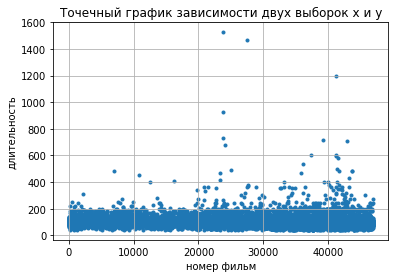

In [26]:
x = [i for i in range(0, len(duration)-1)]
y = df.loc[df['duration'] < 5000, 'duration']

plt.xlabel('номер фильм')
plt.ylabel('длительность')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

In [27]:
df.loc[df['duration'] > 5000, :]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
27639,35647,Farscape,1999,Adventure,5280,United States,"Geoff Bennett, Tony Tilse, Ian Watson","Ben Browder, Virginia Hey, Wayne Pigram, Claud...",8.0,1


# Коррелляция

Взаимосвязь двух выборок друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, необходимо построить точечный график зависимости друг от друга. Например, возьмер 2 параметра - duration и votes. Зависит ли средняя оценка фильма от того, насколько долго он идет?

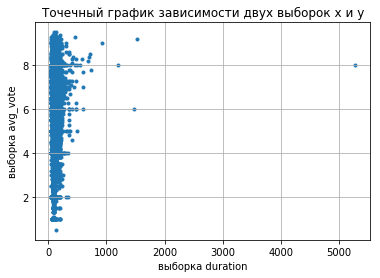

In [28]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

In [0]:
df = df.loc[df['filmtv_ID']!=35647, :]

По данному графику можно заметить, что чем короткие фильмы имеют разные оценки - как низкие, так и высокие. Фильмы средней и большой длины имеют тенденция получать высокие оценки. Таким образом, между двумя выборками мы можем увидеть сильную коррелляцию.

# Нормальное распределение

**Посмотрим как выглядит нормальное распределение на практике**. Возьмем табличное значение avg_vote - среднее значение голосов за данный фильм. Посмотрим график распределения данной величины.

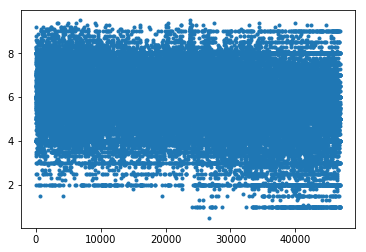

In [29]:
len_column = len(df['avg_vote']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['avg_vote'], marker='.')

По такому графику сложно понять, какое это распределение. Построим частотный график значений. 

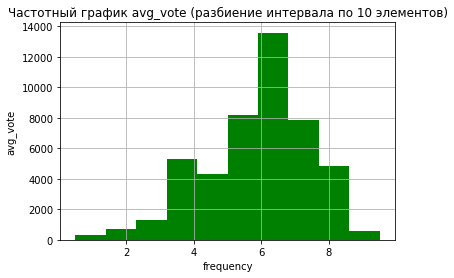

In [30]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['avg_vote'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотный график схож с нормальным распределением с некоторыми отклонениями. Мы можем поменять количество разбиений наших значений с 10 на 100:

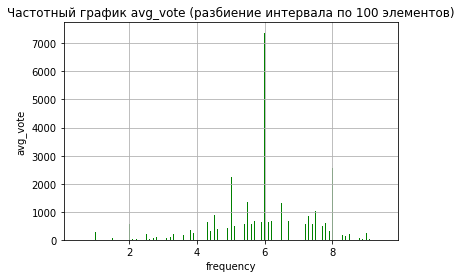

In [31]:
n, bins, patches = plt.hist(df['avg_vote'], 500, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Можно заметить, что у фильмов больше всего оценок 6 (всего таких фильмов со средней оценкой 6 более 7000)

**Зададим нормальное распределение теоритически.**

Зададим 2 выборки с нормальным распределением и построим точечный график зависимости двух переменных друг от друга.
Параметр ```loc``` задаёт $\mu$ или среднее значение, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


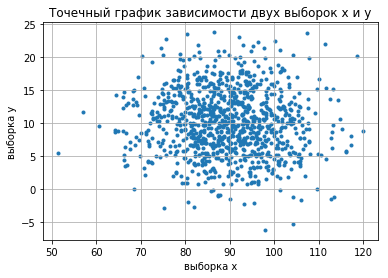

In [32]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим 2 нормально распределенные случайные величины
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

# построим точечный график зависимости двух переменных

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Частотный график выборки y  (или график плотности вероятности).

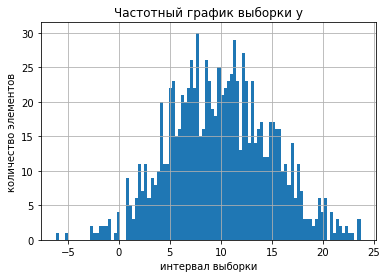

In [33]:
plt.hist(y,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

2-ой способ теоритической генерации нормального распределения: модуль random. 

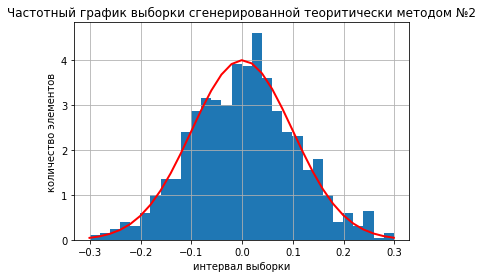

In [34]:
mu, sigma = 0, 0.1 # среднее значение и дисперсия
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
# bins - разбиение интервала
# формула плотности распределения Гаусса
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки сгенерированной теоритически методом №2')
plt.grid(True)
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [35]:
norm_rv1.pdf(3)

1.4622963575006582e-18

Построим графики функции плотности вероятности от различных выборок (с разными параметрами):

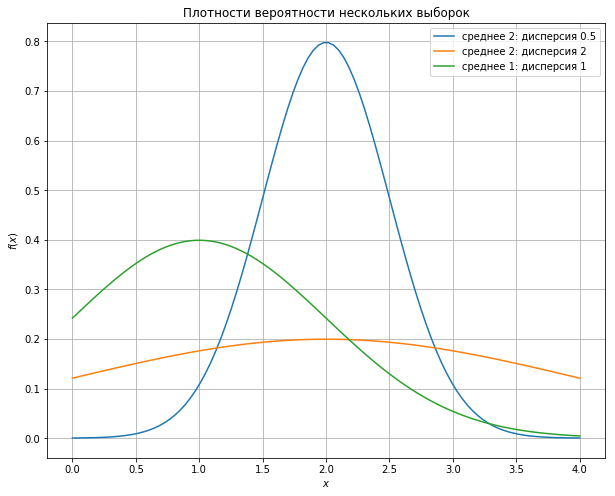

In [36]:
# зададим нормально распределенную случайную величину для нескольких выборок
norm_rv = sts.norm(loc=2, scale=0.5)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)

# зададим вектор x от 0 до 4 с шагом 100 для отрисовки результата
x = np.linspace(0,4,100) 
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(10,8))
plt.plot(x, pdf)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['среднее 2: дисперсия 0.5',  'среднее 2: дисперсия 2', 'среднее 1: дисперсия 1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.grid(True)

# Равномерное распределение на отрезке

Равномерное распределение на практике - это числа идущие последовательно от 0 до целого числа N. В равномерной выборке каждый элемент встречается одинаковое число раз.

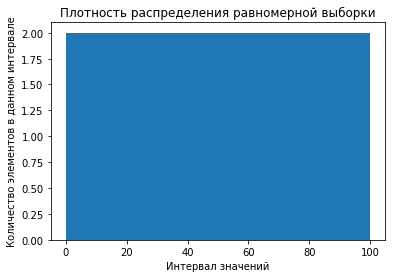

In [37]:
x = np.linspace(0, 100, 100)

plt.ylabel('Количество элементов в данном интервале')
plt.xlabel('Интервал значений')
plt.title('Плотность распределения равномерной выборки')
plt.hist(x, 50)
plt.show()

Сгенерируем теоритически выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

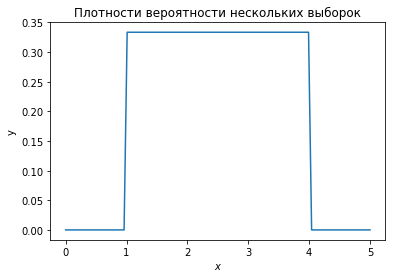

In [38]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

# сгенерируем вектор x для отрисовки значения в pyplot.plot()
x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)

plt.ylabel('y')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.plot(x, pdf)

# Нормализация данных

Операция центрирования

In [39]:
duration = df['duration']
print(statistics.mean(duration))

99.23111689086916


Так как среднее значение не равно 0, необходимо нормализовать.

In [40]:
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

6.817162743332029e-15


Масштабирование выборки

Разброс данных приводим к виду (0,1)  либо (-1,1)

In [41]:
min(duration_1)

-59.23111689086916

In [42]:
max(duration_1)

5180.768883109131

In [43]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


# Корелляция Пирсона

Коэффициент корреляции Пирсона: 1.0


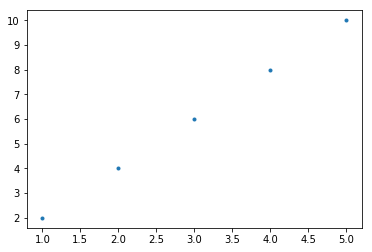

In [44]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

*  Исследуемые переменные X и Y должны быть распределены нормально.
*  Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
*  Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Чем коэффициент ближе к 0, тем более независимы переменные.

In [45]:
corr, p_value = pearsonr(duration, avg_vote)
print(corr)

0.08569623835246332


**Минусы коэффициента корреляции Пирсона:**
- Неустойчивость к выбросам.
- С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

# Центральная предельная теорема

С помощью библиотеки random и метода randint сгенерируем равномерное распределение

In [46]:
from numpy.random import randint

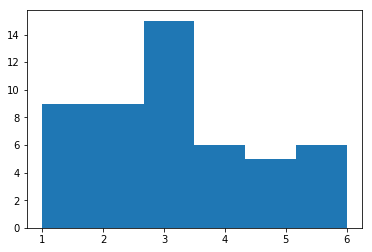

In [47]:
plt.hist(randint(1, 7, 50), 6)
plt.show()

Построим частотный график для суммы элементов нескольких выборок. 

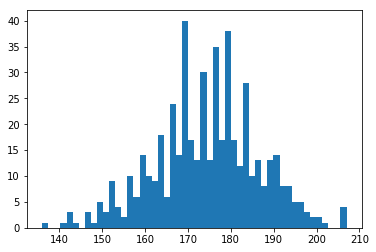

In [48]:
sampleMeans = []

for _ in range(500):
  # 50 элементов, значение которых от 1 до 7
    sampleMean = sum(randint(1, 7, 50))
    sampleMeans.append(sampleMean)

# если построим график - можно увидеть нормальное распределение
plt.hist(sampleMeans, 50)
plt.show()

# Пример корелляции данных, загруженных с помощью pandas

Загружаем данные о ценах на авокадо в США

In [49]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

Печатаем 5 значений

In [50]:
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Размер выборки:

In [51]:
len(df)

18249

Нормализация значений

In [52]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.001026  0.000449
1  0.000877  0.000491
2  0.001890  0.000420
3  0.001262  0.000300
4  0.000815  0.000319


Корелляция скорее всего между Total Volume и Total Bags 

In [53]:
volume = df_norm[0]
bags = df_norm[1]

Посмотрим насколько они зависят друг от друга:

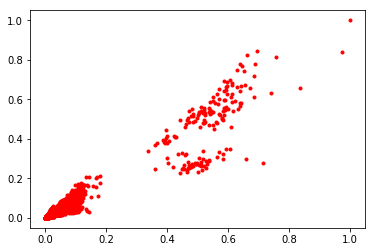

In [54]:
plt.plot(volume, bags, 'r.')
plt.show()

In [55]:
corr, p_value = pearsonr(volume, bags)
print(corr)

0.9630470824267297


Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

Матрица корреляций.

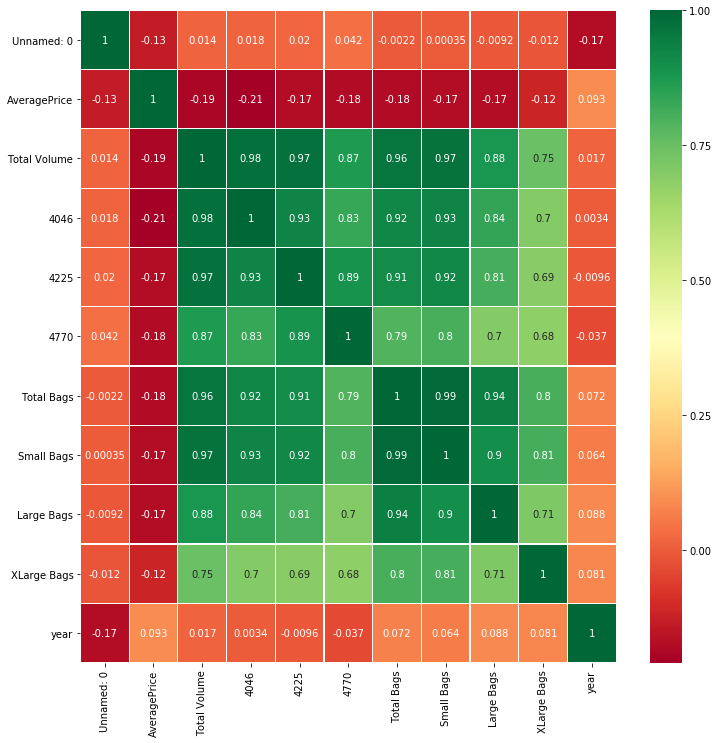

In [56]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()
